In [2]:
import pandas as pd
import numpy as np
garmin_data=pd.read_csv("Garmin_Activities.csv")
dist=garmin_data['Distance']

dist_numpy=np.array(dist)
import numpy as np
import matplotlib.pyplot as plt
avg_pace=garmin_data['Avg Pace']
pace_numpy=np.array(avg_pace)


pace_floatL=[]
dist_floatL=[]
cadence_floatL=[]
avg_stride_lengthL=[]
avg_hrL=[]
# some of the data is missing, so we need to skip over those
# also, we only want to include running data
# in addition, there is some walking data labeled as running and we filter it out based on cadence and pace 
for i,pace in enumerate(pace_numpy):
    if 'Running' not in garmin_data['Activity Type'][i]:
        continue
    if '--' in pace:
        continue
   
    pace_split=pace.split(':')
    pace_float=int(pace_split[0])+int(pace_split[1])/60
  
    if pace_float>14:
        continue
    cadence_float=int(garmin_data['Avg Run Cadence'][i])
    if garmin_data['Avg HR'][i]=='--':
        continue
    avg_hr=int(garmin_data['Avg HR'][i])
    if cadence_float<120:
        continue
    dist_float=float(garmin_data['Distance'][i])
    cadence_floatL.append(cadence_float)
    avg_hrL.append(avg_hr)
    dist_floatL.append(dist_float)
    pace_floatL.append(pace_float)
    avg_stride_lengthL.append(float(garmin_data['Avg Stride Length'][i]))
  
plt.subplot(111)
h_pace=plt.hist(pace_floatL, bins=20, color='c', edgecolor='black')
plt.title('Pace Distribution')
plt.xlabel('Pace (min/mile)')
plt.ylabel('Count')
plt.figure()
plt.subplot(111)
plt.title('Distance Distribution')
h_dist=plt.hist(dist_floatL, bins=20, color='c', edgecolor='black')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')

Text(0, 0.5, 'Counts')

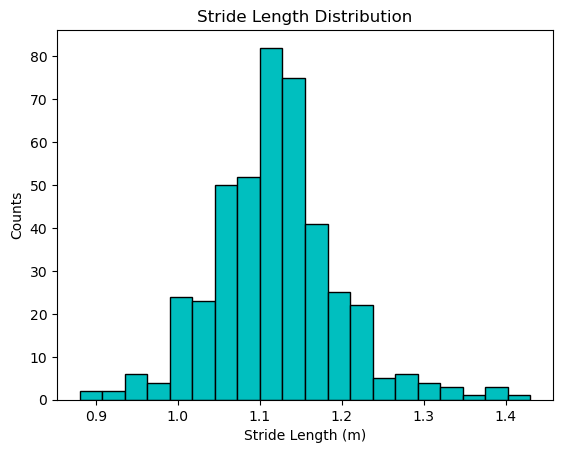

In [17]:
h1=plt.hist(avg_stride_lengthL, bins=20, color='c', edgecolor='black')
plt.title('Stride Length Distribution')
plt.xlabel('Stride Length (m)')
plt.ylabel('Counts')

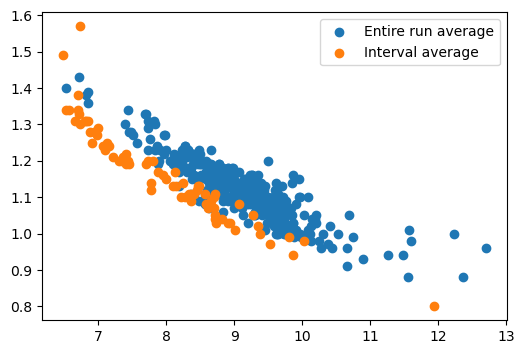

In [22]:
plt.figure(figsize=(6,4))
plt.subplot(111)
plt.scatter(pace_floatL,avg_stride_lengthL,label='Entire run average')
# read and plot recent interval data
new_pace_data=np.loadtxt('interval_paceL.txt')
new_stride_data=np.loadtxt('interval_strideL.txt')
plt.scatter(new_pace_data,new_stride_data,label='Interval average')
plt.legend()


[[ 1.         -0.20093424]
 [-0.20093424  1.        ]]


Text(0, 0.5, 'Pace')

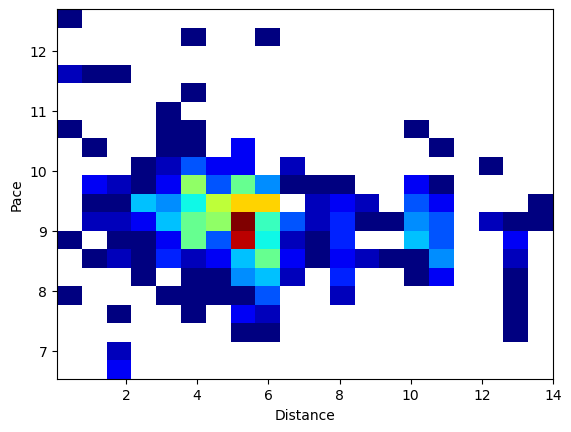

In [23]:
print(np.corrcoef(dist_floatL,pace_floatL))
# is there any correlation between distance and pace?
h2d=plt.hist2d(dist_floatL, pace_floatL, bins=20, cmap='jet', cmin=1)
plt.xlabel('Distance')
plt.ylabel('Pace')
